<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduzione-e-obbiettivi-dell'analisi" data-toc-modified-id="Introduzione-e-obbiettivi-dell'analisi-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduzione e obbiettivi dell'analisi</a></span></li><li><span><a href="#Manipolazione-dei-dati" data-toc-modified-id="Manipolazione-dei-dati-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Manipolazione dei dati</a></span></li><li><span><a href="#Pulizia-dei-dati" data-toc-modified-id="Pulizia-dei-dati-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pulizia dei dati</a></span><ul class="toc-item"><li><span><a href="#Uccisioni-della-polizia" data-toc-modified-id="Uccisioni-della-polizia-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Uccisioni della polizia</a></span></li><li><span><a href="#Popolazione" data-toc-modified-id="Popolazione-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Popolazione</a></span></li><li><span><a href="#Composizione-razziale" data-toc-modified-id="Composizione-razziale-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Composizione razziale</a></span></li><li><span><a href="#Reddito" data-toc-modified-id="Reddito-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Reddito</a></span></li><li><span><a href="#Livello-di-povertà" data-toc-modified-id="Livello-di-povertà-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Livello di povertà</a></span></li><li><span><a href="#Livello-di-istruzione" data-toc-modified-id="Livello-di-istruzione-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Livello di istruzione</a></span></li></ul></li><li><span><a href="#Maggior-numero-di-vittime" data-toc-modified-id="Maggior-numero-di-vittime-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Maggior numero di vittime</a></span></li><li><span><a href="#Analisi-generale-razzismo" data-toc-modified-id="Analisi-generale-razzismo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analisi generale razzismo</a></span></li><li><span><a href="#BlackLivesMatter" data-toc-modified-id="BlackLivesMatter-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>BlackLivesMatter</a></span></li><li><span><a href="#Altre-variabili-" data-toc-modified-id="Altre-variabili--7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Altre variabili </a></span></li><li><span><a href="#Correlazione-con-reddito,-livello-di-povertà-e-educazione" data-toc-modified-id="Correlazione-con-reddito,-livello-di-povertà-e-educazione-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Correlazione con reddito, livello di povertà e educazione</a></span></li><li><span><a href="#Analisi-temporale" data-toc-modified-id="Analisi-temporale-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Analisi temporale</a></span></li><li><span><a href="#Conclusioni" data-toc-modified-id="Conclusioni-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusioni</a></span></li></ul></div>

Introduzione e obbiettivi dell'analisi
===
Il tema delle uccisioni da parte degli ufficiali di polizia sta diventando sempre più attuale, soprattutto negli USA, dove di recente ha portato a grosse sollevazioni e moti di protesta contro un presunti (e non) uso eccessivo della violenza.

La prima parte di questa analisi approfondirà questo argomento, analizzando il fenomeno sia da un punto di vista generale, sia spostando il focus sui singoli stati, per capire se in alcuni di essi esista una maggiore tendenza a fenomeni di questo tipo.

Un altro aspetto rilevante riguarda il fatto che, sempre secondo una parte dell'opinione pubblica, la comunità afroamericana sia subisca maggiormente questo tipo di violenze: da qui la nascita di organizzazioni ad hoc, tra le quali la più celebre 'BlackLivesMatter'. Per questo motivo la seconda parte del report verterà sull'analisi di questa teoria, per valutare se trova effettivamente riscontro all'interno dei dati.

Infine, nell'ultima parte, verranno presi in considerazione ulteriori fattori che potrebbero essere legati al numero di vittime delle autorità, come ad esempio il genere, l'età, il tipo di arma utilizzato e la presenza o meno di segni di malattie mentali.

In [2]:
# importo le librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import minmax_scale
import plotly.express as px
import os

# imposto grandezza grafici e righe dataframe
plt.rcParams['figure.figsize'] = (15, 6)
pd.set_option('display.max_rows', 10)

In [3]:
# carico i dataset
kills = pd.read_csv('data/police_killings_aggiornato.csv')
pop = pd.read_csv('data/PopulationByCity.csv')
races = pd.read_csv('data/ShareRaceByCity.csv')
incomes = pd.read_csv('data/MedianHouseholdIncome2015.csv',
                      encoding='unicode_escape')
poverty_level = pd.read_csv('data/PercentagePeopleBelowPovertyLevel.csv',
                            encoding='unicode_escape')  # non presenta valori mancanti
education = pd.read_csv('data/PercentOver25CompletedHighSchool.csv',
                        encoding='unicode_escape')  # non presenta valori mancanti

Pulizia dei dati
===
Spesso le fonti di dati utilizzate per le analisi presentano valori mancanti. In base alla collocazione e alla quantità, nel seguito verrà valutato come gestirli. Inoltre, gli elementi delle variabili di ogni dataset verranno convertiti nel tipo di dato più adatto.  
Infine, sul dataframe "races" verranno applicate alcune tecniche di data manipulation per rimuovere dagli elementi della colonna "city" alcuni termini ridondanti.  
La maggior parte dei dataframes utilizzati ai fini di questa analisi sono stati forniti da Kaggle. [Al dataset in questione](https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us) è stata integrata la versione aggiornata del dataframe costruito dal Washington Post, ed è stato corredato da un ulteriore dataframe ("pop"), contenente le popolazioni delle maggiori città statunitensi.

Uccisioni della polizia
---
Il seguente dataframe è a sua volta tratto dal sito del Washington Post, il quale redige un elenco aggiornato di tutte le morti violente ad opera degli ufficiali di polizia dal gennaio del 2015. Ogni caso risulta provvisto di informazioni come il genere, l'età e l'etnia della vittima, oltre al modo in cui è stata uccisa, se stesse aggredendo gli ufficiali e numerosi altri dettagli.

In [5]:
# mostro tutte le righe
pd.set_option('display.max_rows', None)

# percentuale di missing values in ogni colonna sul totale
round(kills.isna().sum()[kills.isna().sum() > 0] /
      kills.shape[0] * 100, 2).astype(str) + '%'
# le colonne non riportate non presentano Nan

name         4.06%
armed        3.14%
age          4.71%
gender       0.06%
race         11.3%
flee         7.38%
longitude    4.77%
latitude     4.77%
dtype: object

In [6]:
# rimpiazzo i valori mancanti
kills.fillna(value=dict(name='Unknown', armed='unknown', age=kills.age.median(
), race='unknown', flee='unknown', gender='unknown'), inplace=True)

# elimino righe senza latitudine e longitudine, in quanto i valori sono difficilmente rimpiazzabili e costituiscono meno del 5% degli esempi nel dataset
kills.dropna(subset=['latitude', 'longitude'], inplace=True)

# controllo assenza missing values
kills.isna().sum().sum()

0

In [7]:
# creo una funzione per mostrare le info necessarie delle colonne
def data_info(data):
    for column in data.columns:
        print(column, data[column].dtype.name, len(data[column].unique()))


# la applico al data frame kills
data_info(kills)

id int64 6269
name object 6005
date object 2245
manner_of_death object 2
armed object 96
age float64 78
gender object 3
race object 7
city object 2702
state object 51
signs_of_mental_illness bool 2
threat_level object 3
flee object 5
body_camera bool 2
longitude float64 5530
latitude float64 4933
is_geocoding_exact bool 2


In [8]:
# lista colonne da convertire
col_to_conv = ['manner_of_death', 'armed', 'gender',
               'race', 'state', 'threat_level', 'flee']

# itero sulle colonne
for column in col_to_conv:
    # converto il dtype delle colonne
    kills[column] = kills[column].astype('category')

# converto le date in datetime objects
kills.date = pd.to_datetime(
    kills.date, infer_datetime_format=True, errors='coerce')

# unisco valori simili
kills.armed.replace(
    {'undetermined': 'unknown', 'unknown weapon': 'unknown'}, inplace=True)

# stampo i nuovi tipi di colonne
kills.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                  category
armed                            category
age                               float64
gender                           category
race                             category
city                               object
state                            category
signs_of_mental_illness              bool
threat_level                     category
flee                             category
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
dtype: object

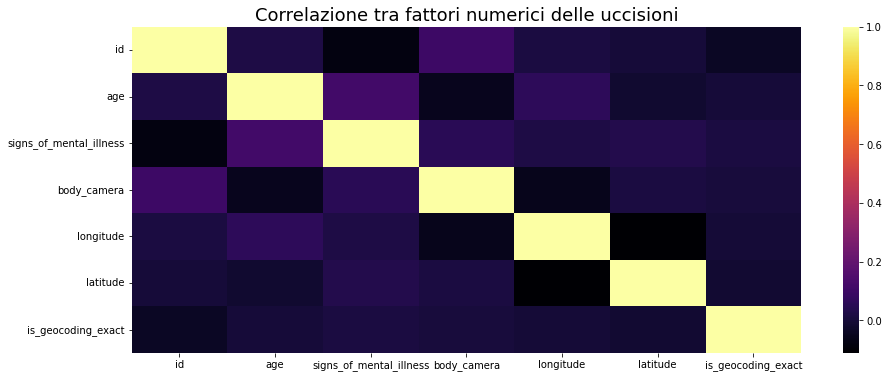

In [9]:
# creo una heatmap per mostrare la correlazione
sns.heatmap(data = kills.corr(), cmap = 'inferno')

# aggiungo un titolo
plt.title('Correlazione tra fattori numerici delle uccisioni', size = 18)

plt.show()

Popolazione
---
Questo dataset registra la popolazione delle maggiori città americane, assieme alle loro coordinate geografiche e lo stato di appartenenza.  
Nel seguito, essendo le coordinate mancanti per molte città, si è scelto di mantenere le righe sprovviste di latitudine e longitudine per non incrementare ulteriormente la perdita di informazione.

In [10]:
# percentuale di missing values in ogni colonna sul totale
round(pop.isna().sum()[pop.isna().sum() > 0] /
      pop.shape[0] * 100, 2).astype(str) + '%'
# le colonne non riportate non presentano Nan

lat    21.33%
lng    21.33%
dtype: object

In [11]:
# in questo caso le righe con dati mancanti verranno mantenute, in quanto possono essere utili per la EDA, cosituendo più del 20% dei dati totali. 

In [12]:
# dtypes e valori unici
data_info(pop)

city object 2505
state object 51
population float64 2262
lat float64 2215
lng float64 2218


In [13]:
# converto 'state' in categorica
pop.state = pop.state.astype('category')

# converto population in int
pop.population = round(pop.population).astype(int)

# stampo i dtypes delle series
pop.dtypes

city            object
state         category
population       int32
lat            float64
lng            float64
dtype: object

Composizione razziale
---
Il dataset "races" contiene la quota di popolazione bianca, asiatica, nera, ispanica e nativa per ognuna delle città presenti.

In [14]:
# lista dei termini da eliminare dai nomi delle città
stopwords = [' town', ' city', ' CDP', ' village']

# creo una funzione per eliminare le stopwords
def name_cleaner(city):
    for word in stopwords:
        if word in city:
            city = city.replace(word, '')
    return city


# applico la funzione alla colonna 'City'
races['city'] = races.City.apply(lambda city: name_cleaner(city))

# elimino la vecchia colonna
races.drop(columns='City', inplace=True)

# rinomino la colonna 'Geographic area' come 'state'
races = races.rename(columns={'Geographic area': 'state'})

In [15]:
# percentuale di missing values in ogni colonna sul totale
round(races.isna().sum()[races.isna().sum() > 0]/races.shape[0] * 100, 2).astype(str) + '%'
# le colonne non riportate non presentano Nan

Series([], dtype: object)

In [16]:
# stampo info colonne races
data_info(races)

state object 51
share_white object 997
share_black object 926
share_native_american object 628
share_asian object 409
share_hispanic object 956
city object 19940


In [17]:
races.replace(to_replace= '(X)', value = np.nan, inplace= True)

In [18]:
# itero sulle colonne di races
for column in races.columns:
    # se la colonna contiene una quota
    if column[:6] == 'share_':
        # converto la colonna in tipo float
        races[column] = races[column].astype(float)

# converto colonna state in categorica
races.state = races.state.astype('category')

# stampo i dtypes
races.dtypes

state                    category
share_white               float64
share_black               float64
share_native_american     float64
share_asian               float64
share_hispanic            float64
city                       object
dtype: object

Reddito
---
"incomes" rileva il reddito medio dei cittadini di ogni città.

In [19]:
# sostituisco '(X)' con valori mancanti
incomes.replace({'(X)': np.nan, '-': np.nan, '2,500-': '2500', '250,000+': '250000'}, inplace= True)

In [20]:
# percentuale di missing values in ogni colonna sul totale
round(incomes.isna().sum()[incomes.isna().sum() > 0]/incomes.shape[0] * 100, 2).astype(str) + '%'
# le colonne non riportate non presentano Nan

Median Income    6.49%
dtype: object

In [21]:
# stampo info di incomes
data_info(incomes)

Geographic Area object 51
City object 24249
Median Income object 14591


In [22]:
# converto colonna stati in categorica
incomes['Geographic Area'] = incomes['Geographic Area'].astype('category')

# converto Median Income in numerica
incomes['Median Income'] = incomes['Median Income'].astype(float)

# stampo i dtypes del dataframe
incomes.dtypes

Geographic Area    category
City                 object
Median Income       float64
dtype: object

In [23]:
# rimpiazzo valori mancanti di Median Income con la mediana
incomes.fillna({'Median Income' : incomes['Median Income'].median()}, inplace = True)

Livello di povertà
---
"poverty_level" contiene la quota di persone sotto la soglia di povertà per ogni città presente nel dataframe. 

In [24]:
# sostituisco '-' con valori mancanti
poverty_level.replace({'-': np.nan}, inplace= True)

In [25]:
# percentuale di missing values in ogni colonna sul totale
round(poverty_level.isna().sum()[poverty_level.isna().sum() > 0]/poverty_level.shape[0] * 100, 2).astype(str) + '%'
# le colonne non riportate non presentano Nan

poverty_rate    0.69%
dtype: object

In [26]:
# essendo gli esempi con valori mancanti inferiori all'1%, elimino le righe corrispondenti
poverty_level.dropna(inplace = True)

In [27]:
# stampo info poverty_level
data_info(poverty_level)

Geographic Area object 51
City object 24084
poverty_rate object 770


In [28]:
# converto poverty_rate in float
poverty_level.poverty_rate = poverty_level.poverty_rate.astype(float)

# converto stati in categorica
poverty_level['Geographic Area'] = poverty_level['Geographic Area'].astype('category')

# stampo i dtypes
poverty_level.dtypes

Geographic Area    category
City                 object
poverty_rate        float64
dtype: object

Livello di istruzione
---
Le città del dataframe "education" sono provviste della percentuale di cittadini che hanno completato la high school. 

In [29]:
# sostituisco '-' con valori mancanti
education.replace({'-': np.nan}, inplace= True)

In [30]:
# percentuale di missing values in ogni colonna sul totale
round(education.isna().sum()[education.isna().sum() > 0]/education.shape[0] * 100, 2).astype(str) + '%'
# le colonne non riportate non presentano Nan

percent_completed_hs    0.67%
dtype: object

In [31]:
# essendo gli esempi con valori mancanti inferiori all'1%, elimino le righe corrispondenti
education.dropna(inplace = True)

In [32]:
# stampo info education
data_info(education)

Geographic Area object 51
City object 24089
percent_completed_hs object 727


In [33]:
# converto colonna in tipo float
education.percent_completed_hs = education.percent_completed_hs.astype(float)

# converto stati in categorica
education['Geographic Area'] = education['Geographic Area'].astype('category')

# stampo i dtypes
education.dtypes

Geographic Area         category
City                      object
percent_completed_hs     float64
dtype: object

---

Maggior numero di vittime
===
In questa sezione metteremo in risalto gli stati con il maggior (e il minor) numero di uccisioni in rapporto alla popolazione; in questo capitolo dell'analisi **non** distingueremo in base all'etnia di appartenenza delle vittime.

In [34]:
# creo dataframe con numero di vittime per ogni stato
kills_per_state = pd.DataFrame(kills.state.value_counts())
# rinomino la colonna 'state'
kills_per_state.rename(columns = {'state':'kills'}, inplace = True)
# rinomino l'indice
kills_per_state.index.rename('state', inplace = True)

# creo dataframe con popolazione per ogni stato
pop_per_state = pop.groupby('state').population.sum().to_frame()
pop_per_state.head()

# unisco i due dataframe
pop_kills = pop_per_state.merge(kills_per_state, on = 'state')

# creo nuova colonna con tasso di uccisioni per stato
pop_kills['kills_per_10k'] = pop_kills.kills/pop_kills.population * 10000

# ordino il dataframe in base al tasso di uccisioni
pop_kills.sort_values(by = 'kills_per_10k',ascending = False, inplace = True)

# reimposto l'indice
pop_kills.reset_index(inplace= True)

In [35]:
# creo una mappa
fig = px.choropleth(data_frame = pop_kills, locations = 'state', locationmode = 'USA-states', scope = 'usa', color = 'kills_per_10k', color_continuous_scale = 'inferno_r', title = 'KILLS EVERY 10K INHABITANTS BY STATE')

# modifico aspetto
fig.update_layout(geo_showlakes = False)

# imposto elementi del grafico
fig.update_layout(width = 850, margin = dict(t = 50, b = 0, l = 0, r = 0))

fig.show()

Dalla mappa è facile notare come gli stati in cui è maggiore la tendenza a fare vittime presentino le più disparate posizioni: nel Maine (costa nordorientale) si registra un alto numero di vittime rispetto alla popolazione, così come nel New Mexico, situato al confine merdidionale. La collocazione geografica dello stato non sembra essere correlata al numero di vittime.  
La mappa è stata costruita in modo che lo stato con il colore più scuro corrisponda a quello dove sono state riportate le maggiori uccisioni in rapporto alla popolazione, ovvero l'Alaska. Gli stati più virtuosi assumono le tonalità più chiare, come ad esempio il Massachussets e lo stato di New York, ma anche alcuni più centrali come l'Illinois.

---

Analisi generale razzismo
===
Ora che abbiamo analizzato in generale quali sono gli stati più "pericolosi" metteremo in luce le differenze tra le quote di cittadini statunitensi di ogni razza e le quote di vittime di ogni razza rispetto al totale delle vittime. In altre parole paragoneremo la presenza di ogni etnia tra le vittime con quella nella popolazione, per individuare eventuali squilibri.

In [37]:
# calcolo il numero di vittime per ogni razza sul totale delle vittime

# totale vittime per razza
kills_per_race = kills.race.value_counts() 

# divido il totale di ogni razza per il totale delle vittime
kills_rate = pd.DataFrame(kills_per_race/kills_per_race.sum())

# rinomino la colonna con i tassi di uccisione per ogni razza
kills_rate.rename(columns = {'race':'rate'}, inplace = True)

# rinomino l'indice
kills_rate.index.rename('race', inplace = True)

In [38]:
# creo races_pop che contiene la popolazione e le quote di razza per ogni città
races_pop = pop.merge(races, on = ['state','city'])

# creo colonne con totale abitanti per ogni razza di ogni città
for race_share in races_pop.columns[races_pop.columns.get_loc('share_white'):]:
    race_name = race_share[race_share.index('_') + 1 : ]
    tot_race = 'tot_' + race_name
    races_pop[tot_race] = races_pop[race_share].astype(float)/100 * races_pop.population

# arrotondo il numero (sono persone, non possono essere numeri decimali) 
races_pop.loc[:,'tot_white':].round(decimals = 0)

# trasformo i numeri in interi
races_pop.loc[:,'tot_white':] = races_pop.loc[:,'tot_white':].astype(int)

In [40]:
# calcolo le quote di ogni razza nella popolazione
pop_race_shares = races_pop.loc[:,'tot_white':].sum()/races_pop.loc[:,'tot_white':].sum().sum()

# creo un data frame con le quote
pop_race_shares = pop_race_shares.to_frame()

# rinomino la colonna
pop_race_shares.rename( columns = {0:'rate'}, inplace = True)

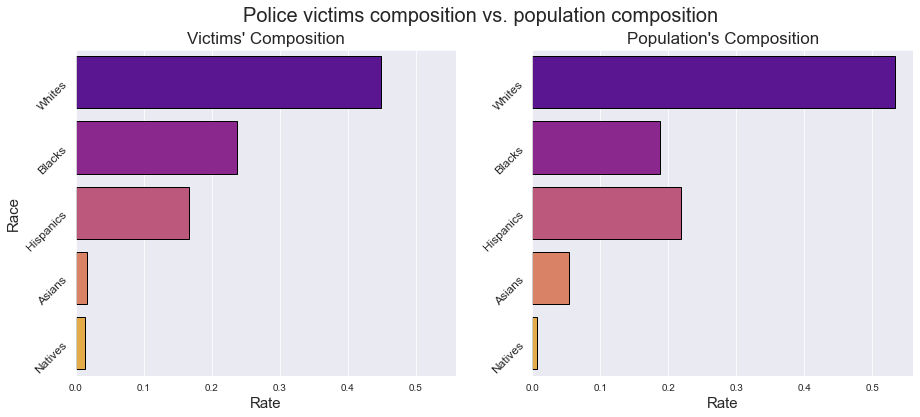

In [41]:
# imposto lo stile 
sns.set_style('darkgrid')

# creo subplots
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6), sharex = True)

# inserisco il titolo
fig.suptitle('Police victims composition vs. population composition', fontsize = 20)

# creo barplot per la quota di vittime per razza
sns.barplot(ax = ax[0], data = kills_rate, y = kills_rate.index, x = 'rate', palette = 'plasma', edgecolor = 'black', order = ['W', 'B', 'H', 'A', 'N'])

# barplot quote razze nella popolazione
sns.barplot(ax = ax[1], data = pop_race_shares, x = 'rate', y = pop_race_shares.index, palette = 'plasma', edgecolor = 'black', order = ['tot_white', 'tot_black', 'tot_hispanic', 'tot_asian', 'tot_native_american'])

# imposto titoli dei grafici
ax[0].set_title('Victims\' Composition', fontsize = 17)
ax[1].set_title('Population\'s Composition', fontsize = 17)

# imposto titoli assi x
ax[0].set_xlabel('Rate', size = 15)
ax[1].set_xlabel('Rate', size = 15)

# imposto titoli assi y
ax[0].set_ylabel('Race', size = 15)

# imposto xticks
ax[0].set_yticklabels(['Whites', 'Blacks', 'Hispanics', 'Asians', 'Natives'], size = 12, rotation = 45)
ax[1].set_yticklabels(['Whites', 'Blacks', 'Hispanics', 'Asians', 'Natives'], size = 12, rotation = 45)

# mostro il grafico
plt.show()

Dal grafico emerge come la quota di vittime afroamericane sia maggiore rispetto alla loro quota all'interno della popolazione.
Questo fatto può avere portato alla nascita dei movimenti contro la violenza della polizia quali ad esempio 'BlackLivesMatter'.

L'analisi del prossimo paragrafo approfondirà ulteriormente questo tema.

---

BlackLivesMatter
===
Di seguito analizzeremo i dati, per capire se si possa parlare di un vero e proprio fenomeno di razzismo, o se si tratti di casi isolati.

In questa sezione verrà analizzata la situazione nei diversi stati. In questo caso rapportare le vittime nere con la popolazione afroamericana di ogni stato non avrebbe molto senso perchè, come abbiamo visto, il tasso di vittime generale della polizia varia da stato a stato: un alto rapporto tra vittime nere e popolazione afroamericana potrebbe essere sintomo di una tendenza generalizzata della poliza di quello stato a fare più vittime, indipendentemente dalla razza.

Per questo confronteremo per ogni stato la quota di vittime nere sul totale delle vittime e il tasso di afroamericani nella popolazione, cercando gli stati in cui si riscontrano maggiori differenze. In sostanza, estenderemo il ragionamento portato avanti nel capitolo precedente per ognuno degli stati americani.

In [42]:
# totale afroamericani e popolazione di ogni stato
blacks_by_state = races_pop.groupby('state')[['tot_black','population']].sum()

# quota di neri per stato
blacks_by_state['shares'] = blacks_by_state.tot_black / blacks_by_state.population

# percentuale di neri per stato
blacks_by_state['percentage'] = (blacks_by_state.shares * 100).round(decimals = 1)

# ordino in base alle shares di afroamercani
blacks_by_state = blacks_by_state.sort_values(by = 'shares', ascending = False)

In [43]:
# numero di vittime per razza per ogni stato
kills_state_race = kills.pivot_table(kills, index = 'state', columns = 'race', aggfunc = 'size', fill_value = 0)

# creo colonna con vittime totali per ogni stato
kills_state_race['total'] = kills_state_race.sum(axis = 1)

# quota di afroamericani sul totale delle vittime di ogni stato
kills_state_race['% black kills'] = (kills_state_race.B / kills_state_race.total * 100).round( decimals = 1)

# ordino il dataframe per '% black kills'
kills_state_race = kills_state_race.sort_values(by = '% black kills', ascending = False)

# per coerenza col dataframe precedente elimino il DC dagli stati
kills_state_race = kills_state_race.drop(index = 'DC')

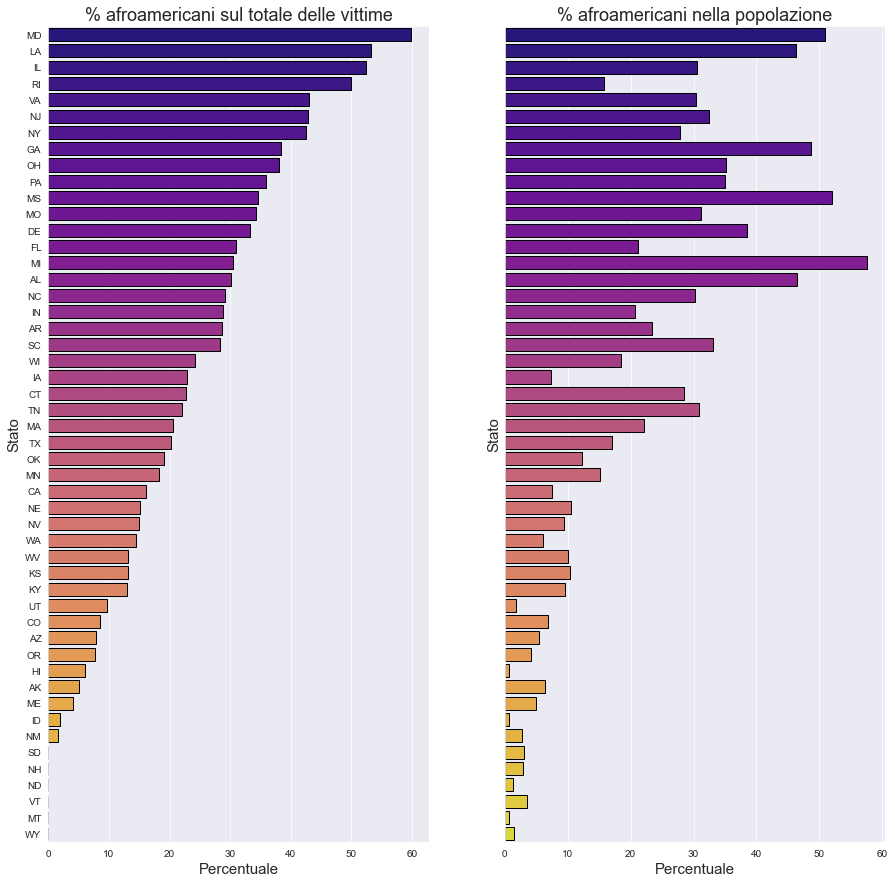

In [44]:
# visualizzazione
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,15), sharey = True)

# afroamericani sul totale delle vittime per stato
sns.barplot(data = kills_state_race, x = '% black kills', y = kills_state_race.index, ax = ax[0], order = kills_state_race.index.to_list() ,palette = 'plasma', edgecolor = 'black')

# percentuale di afroamericani nella popolazione per stato
sns.barplot(data = blacks_by_state, x = 'percentage', y = blacks_by_state.index, ax = ax[1], palette = 'plasma', order = kills_state_race.index.to_list(), edgecolor = 'black')

# imposto titoli grafici
ax[0].set_title(label = '% afroamericani sul totale delle vittime', fontsize = 18)
ax[1].set_title(label = '% afroamericani nella popolazione', fontsize = 18)

# imposto titoli assi x
ax[0].set_xlabel('Percentuale', size = 15)
ax[1].set_xlabel('Percentuale', size = 15)

# imposto titoli assi y
ax[0].set_ylabel('Stato', size = 15)
ax[1].set_ylabel('Stato', size = 15)

plt.show()

Da questi grafici emergono forti disuguaglianze ma il confronto rimane difficoltoso. Per avere una visione più chiara possiamo calcolare la differenza tra la percentuale di neri uccisi e la loro quota nella popolazione.

In [45]:
# differenze tra % di vittime e quota della poplazione per ogni stato
differences = kills_state_race['% black kills'] - blacks_by_state.percentage

# ordino la serie
differences = differences.sort_values(ascending = False)

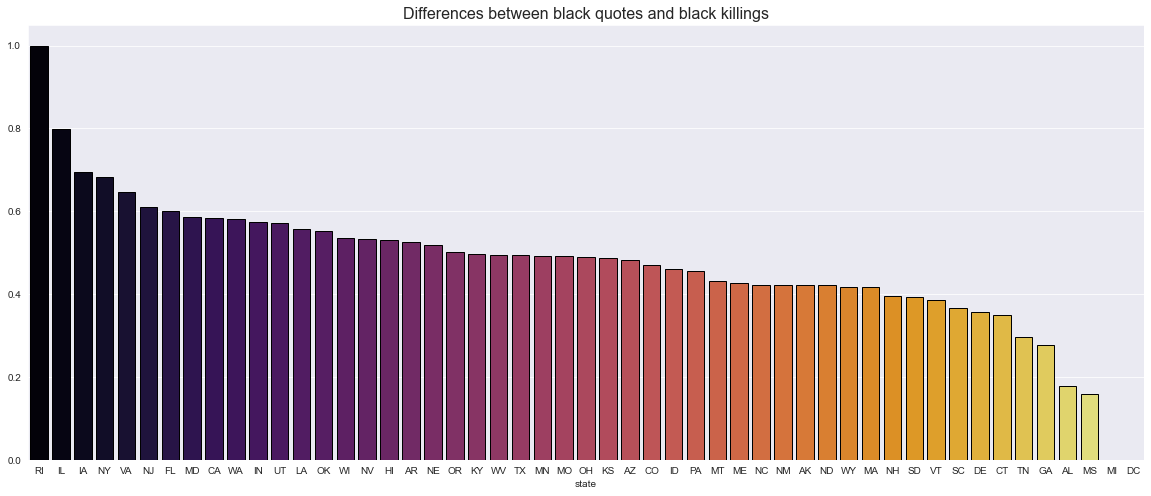

In [46]:
# scalo i valori
scaled_diff = minmax_scale(differences)

# creo una figura
plt.figure(figsize = (20,8))

# barplot per le differenze
sns.barplot(y = scaled_diff, x = differences.index, edgecolor = 'black', palette= 'inferno', order = differences.index.to_list())

# titolo del grafico
plt.title('Differences between black quotes and black killings', fontsize = 16)

plt.show()

Gli stati in cui la quota di neri uccisi è sensibilmente più alta rispetto alla loro percentuale nella popolazione sono lo stato di Rhode Island, l'Illinois, il New York e il New Jersey.  
E' interessante notare come approfondendo l'analisi, alcuni stati, che in prima istanza sembravano essere tra i più virtuosi, risultano presentare i maggiori problemi sotto questo particolare aspetto.

Inoltre ciò che accoumuna molti degli stati più critici è che sono tutti situati sulla costa orientale (tranne l'Illinois) e sono a maggioranza democratica, rivelando una possibile correlazione dal punto di vista politico e geografico che non era emersa precedentemente.

Ovviamente bisognerebbe condurre analisi più approfondite prima di stabilire definitivamente una correlazione tra il fattore geopolitico e il tasso di vittime della polizia.

Si può anche notare come in Alabama, Mississipi e Michigan i tassi di vittime afroamericane rispetto alla quota della popolazione siano i più bassi in assoluto.

---

Altre variabili 
===
In questa sezione analizzeremo come varia l'età delle vittime in base al genere e al fatto che mostrino o meno segni di malattie mentali; studieremo il livello di minaccia dei vari episodi e le armi più utilizzate dalla polizia.

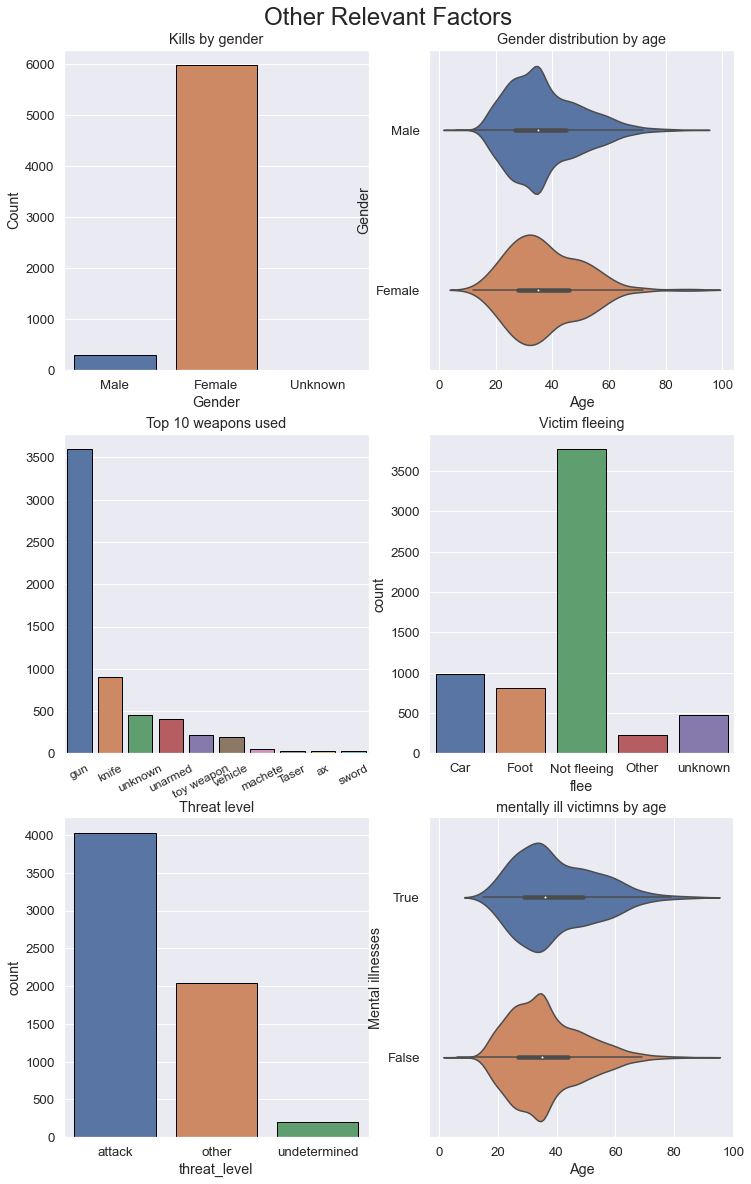

In [48]:
# ignoro warnings
warnings.filterwarnings('ignore')

# aumento grandezza del testo
sns.set(font_scale = 1.2)

# creo dei subplots
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 20))

# vittime per genere
sns.countplot(kills.gender, edgecolor = 'black', ax = axis[0,0])
# imposto titoli
axis[0,0].set(title = 'Kills by gender', xlabel = 'Gender', ylabel = 'Count', xticklabels = ['Male', 'Female','Unknown'])

# rappresento come varia distribuzione di età in base al genere
sns.violinplot(data = kills, y= 'gender', x = 'age', ax = axis[0,1], order = ['M', 'F'])
# imposto titoli
axis[0,1].set(title = 'Gender distribution by age', xlabel = 'Age', ylabel = 'Gender', yticklabels = ['Male', 'Female'])

# estraggo le 10 armi più utilizzate
armed = kills.armed.value_counts()[0:10]
# creo un barplot
sns.barplot(x = armed.index, y = armed.values, ax = axis[1,0], edgecolor = 'black', order = armed.index.to_list())
# imposto titolo
axis[1,0].set_title('Top 10 weapons used')
# imposto xticks
axis[1,0].tick_params(axis = 'x', labelrotation = 27, labelsize = 12)

# se la vittima stava scappando e come
sns.countplot(data = kills, x = 'flee', ax = axis[1,1], edgecolor = 'black')
# imposto titolo
axis[1,1].set_title('Victim fleeing')

# livello di minaccia
sns.countplot(kills.threat_level, ax = axis[2,0], edgecolor = 'black')
# imposto titolo
axis[2,0].set_title('Threat level')

# converto in stringhe gli elementi della serie
kills['signs_of_mental_illness'] = kills.signs_of_mental_illness.astype(str)
# distribuzione età vs malattie mentali
sns.violinplot(data = kills, y = 'signs_of_mental_illness', x = 'age', ax = axis[2,1])
# imposto titoli
axis[2,1].set(title = 'mentally ill victimns by age', xlabel = 'Age', ylabel = 'Mental illnesses', yticklabels = ['True', 'False'])

# titolo della figura
fig.suptitle('Other Relevant Factors', fontsize = 24, y = 0.91)

plt.show()

Il numero di uomini uccisi è molto superiore rispetto a quello di donne. Tuttavia la distribuzione per età non varia molto: si può osservare come quella delle vittime di genere maschile sia solamente un po' più concentrata tra i 20 e i 40 anni rispetto alle donne.

Lo stesso vale per le vittime che presentano segni di malattie mentali, solo leggermente più propense ad essere uccise anche in età più avanzata.

Si può inoltre osservare come secondo i rapporti, la maggioranza delle vittime non stesse scappando; questo può essere dovuto al fatto che nella maggioranza dei casi le vittime della polizia stessero aggredendo gli ufficiali, come emerge dall'analisi dei livelli di minaccia.

In [50]:
# percentuale di NaN in colonna age di kills
kills.age.isna().sum()/len(kills.age)

# sostituisco i valori mancanti di ages con il precedente
ages_filled = kills.age.fillna(method= 'ffill')

# divido la serie in categorie
cat_ages = pd.cut(ages_filled, bins = [0, 18, 30, 40, 50, 60, 80], labels=['0-18', '19-30', '31-40', '40-50', '50-60', '60-80'])
# in bins escluso inizio intervallo e inclusa la fine

# inserisco la serie nel dataframe
kills.insert(5, 'Age_Group', cat_ages)

# nuova colonna
print(kills.Age_Group.head())

0    50-60
1    40-50
2    19-30
3    31-40
4    31-40
Name: Age_Group, dtype: category
Categories (6, object): ['0-18' < '19-30' < '31-40' < '40-50' < '50-60' < '60-80']


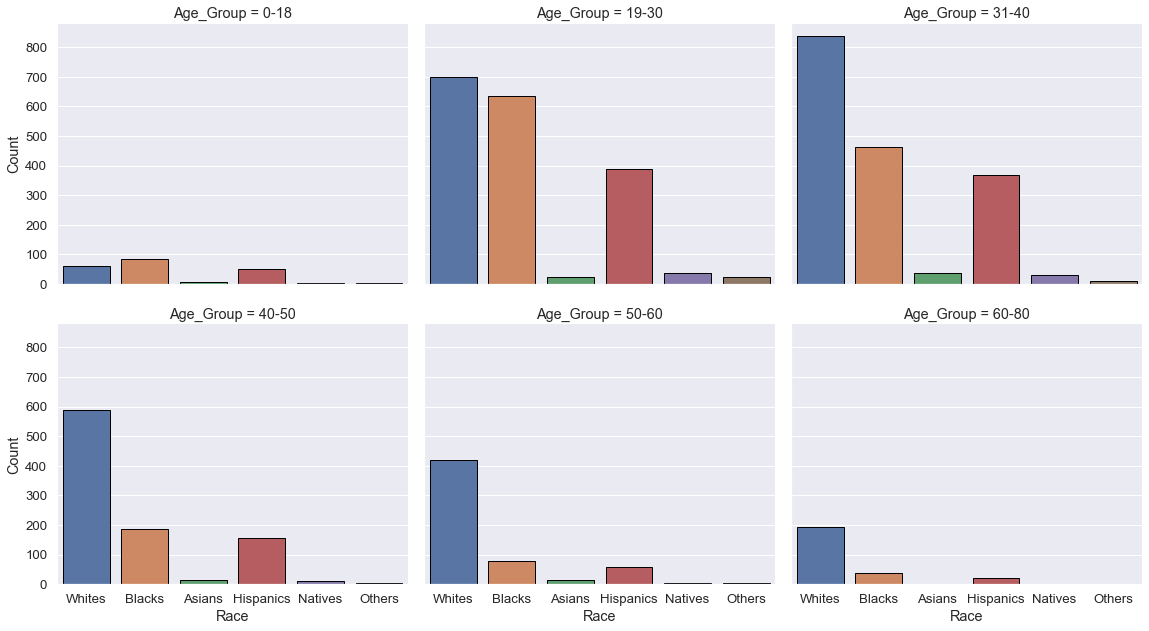

In [51]:
# creo FacetGrid
g = sns.catplot(kind = 'count', data = kills, col = 'Age_Group', x = 'race', col_wrap= 3, height = 4.5, aspect = 1.2, edgecolor = 'black', order = ['W', 'B', 'A', 'H', 'N', 'O'])

# modifico elementi del grafico
g.set(xticklabels = ['Whites', 'Blacks', 'Asians', 'Hispanics', 'Natives', 'Others'], xlabel = 'Race', ylabel = 'Count')

# mostro il grafico 
plt.show()

Nella quasi totalità delle fasce d'età la razza che conta il più alto numero di vittime sono i bianchi, anche in virtù di una loro maggiore presenza all'interno della popolazione. Spicca però un fatto interessate: tra i 19 e i 30 anni il numero di vittime nere quasi pareggia quello di bianchi uccisi. Ciò potrebbe essere dovuto a due diversi scenari:

1. La quota di afroamericani nella popolazione totale è sensibilmente più alta per quella specifica fascia di età, e quindi il maggior numero di vittime è una conseguenza "statistica" di questo fatto.
2. Una propensione delle persone di colore a commettere più crimini tra i 19 e i 30 anni, magari spinte da altri fattori rilevanti come una condizione di povertà più diffusa o un più basso livello di istruzione.

Sebbene i dati a disposizione siano nettamente inferiori, questa "anomalia" sembra valere anche per la fascia 0-18 anni, dove il numero di neri uccisi addirittura supera quello dei bianchi.

Dal momento che questo fenomeno merita di essere ulteriormente approfondito, di seguito verrà studiata la composizione della popolazione americana lungo le varie fasce d'età.

---

# Correlazione con reddito, livello di povertà e educazione

In [52]:
# creo un data frame con i vari fattori
factors = incomes.merge(poverty_level, on = ['Geographic Area','City']).merge(education, on = ['Geographic Area','City'])

# converto in float colonne con tasso di povertà, reddito mediano e percentuale di completamento high school
factors.loc[:,'Median Income':'percent_completed_hs'] = factors.loc[:,'Median Income':'percent_completed_hs'].replace({'(X)':np.nan, '-':np.nan, '2,500-':'2500', '250,000+':'250000'}).astype(float)

# rinomino colonne
factors = factors.rename(columns = {'Geographic Area':'state','City':'city'})

# modifico i nomi delle città
factors.city = factors.city.apply(lambda city: name_cleaner(city))

In [53]:
# creo un dataframe con le morti per ogni ciità
kills_by_city = kills.groupby(['state','city']).size().to_frame().rename(columns = {0:'kills'})

# lo unisco a factors
kills_by_city_factors = kills_by_city.merge(factors, on =['state','city']).merge(pop, on =['state','city'])

# stampo il nuovo dataframe
kills_by_city_factors.head(5)

,state,city,kills,Median Income,poverty_rate,percent_completed_hs,population,lat,lng
0,AK,Anchor Point,1,51591.0,10.1,93.8,2057,59.7703,-151.7052
1,AK,Barrow,1,76902.0,11.7,84.6,4178,NaN,NaN
2,AK,Copper Center,1,39063.0,18.8,84.8,397,61.9845,-145.3544
3,AK,Fairbanks,10,55229.0,13.1,91.2,64732,64.8353,-147.6534
4,AK,Houston,1,50438.0,14.8,90.2,2347,61.6159,-149.8003


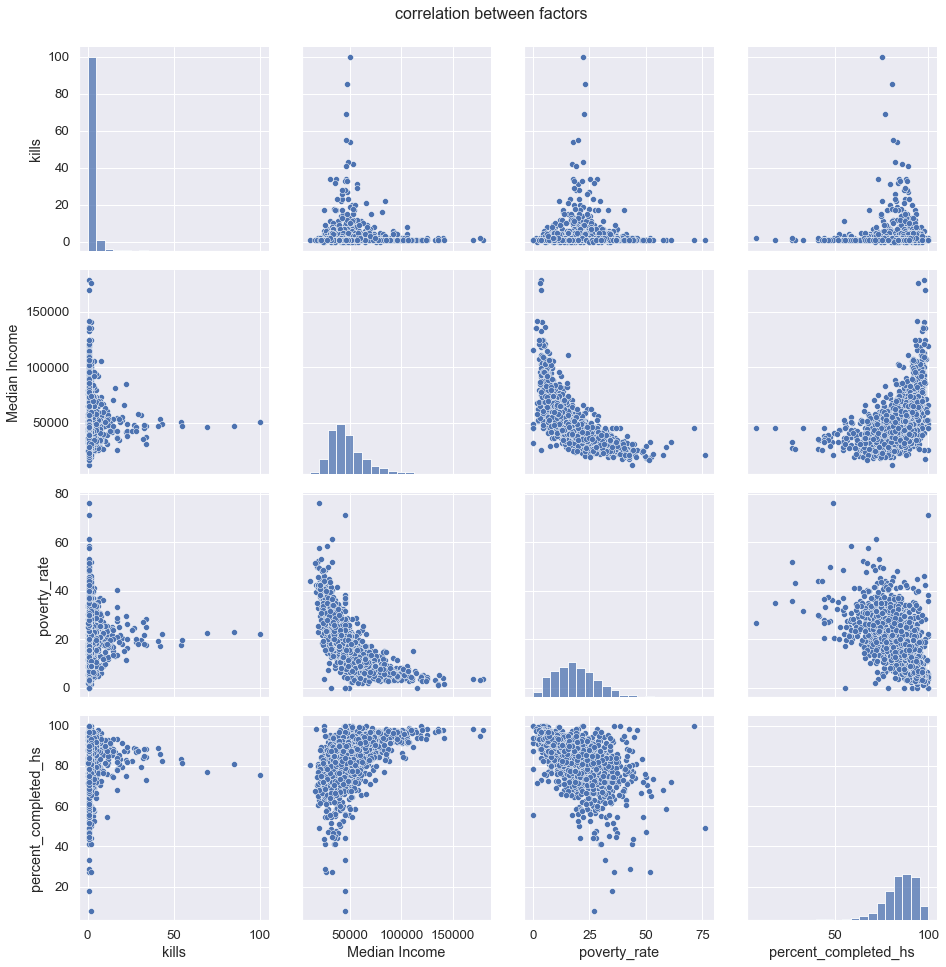

In [54]:
# aumento la dimensione del testo
sns.set(font_scale = 1.2)

# creo un pariplot
g = sns.PairGrid(kills_by_city_factors.loc[:,:'percent_completed_hs'], height = 3.3)
# imposto grafici sulla diagonale
g.map_diag(sns.histplot, bins = 20)
# imposto grafici fuori dalla diagonale
g.map_offdiag(sns.scatterplot)

# aggiungo il titolo della figura
g.fig.suptitle('correlation between factors', y = 1.02, fontsize = 16)

plt.show()

Da questo pairplot emerge una correlazione negativa abbastanza forte tra il tasso di povertà della popolazione e la percentuale di over 25 che hanno completato la high school. Ovviamente il grafico denota anche una relazione di proporzionalità inversa tra il reddito mediano e il tasso di povertà.

In molte città con un basso reddito mediano si verifica un alto numero di uccisioni: sintomo che in molti casi è la povertà che spinge le vittime a commettere crimini. 

Ciò che sorprende è il grande numero di uccisioni in città con percentuali di completamento dell'high school alte e poverty rate bassi: questo può essere dovuto anche al grande numero di abitanti di queste città. Per ovviare al probelma, di seguito approfondiremo l'analisi di quesi casi utilizzando il numero di uccisioni ogni 10mila abitanti. Per ottenere tassi attendibili prenderemo solamente campioni sufficientemente ampi, nel caso specifico città con più di 100mila abitanti.

In [56]:
# creo un dataframe con le città con più di 100 mila abitanti
kills_by_bigcity = kills_by_city_factors[kills_by_city_factors.population >= 100000]

# calcolo persone uccise per 10k abitanti
kills_by_bigcity['kills_rate'] = round(kills_by_bigcity.kills/kills_by_bigcity.population * 10000, 3)

# ordino in base ai tassi
kills_by_bigcity.sort_values(by = 'kills_rate', ascending = False, inplace = True)

# salvo access token
access_token = 'pk.eyJ1IjoiZWRvdHVycmkiLCJhIjoiY2t1djM3Ym95MWR0dDJvbzI1MXJpOWJpZSJ9.wd6mEi7SSFead6KlWIbsjQ'

# creo mappa delle città col più alto tasso di uccisioni 
fig = px.scatter_mapbox(data_frame = kills_by_bigcity, lat="lat", lon="lng", hover_name = "city", color = 'kills_rate', color_continuous_scale = 'matter', zoom = 3.25, height = 500, width = 1000, size = 'kills_rate', title = 'KILLS RATE BY CITY')

# modifico lo stile del grafico
fig.update_layout(mapbox_style = "streets", mapbox_accesstoken = access_token)

# modifico i margini
fig.update_layout(margin = {"r":0, "t": 50, "l":0, "b":0})

fig.show()

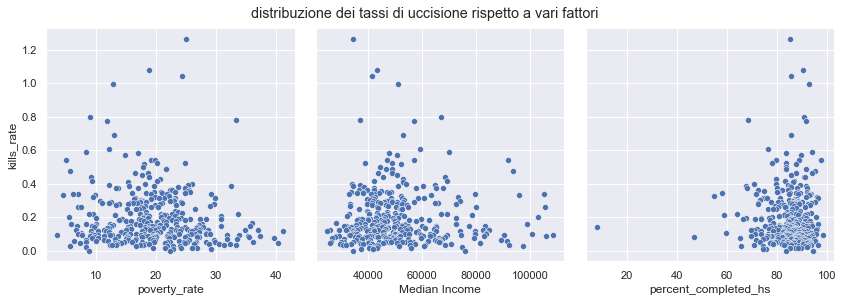

In [57]:
# aumento il font
sns.set(font_scale = 1)

# creo un pairplot
g = sns.PairGrid(kills_by_bigcity, y_vars = ['kills_rate'], x_vars = ['poverty_rate','Median Income','percent_completed_hs'], height = 4)
g.map(sns.scatterplot)

# aggiungo il titolo
g.fig.suptitle('distribuzione dei tassi di uccisione rispetto a vari fattori', y = 1.03)

plt.show()

Analizzando più nel dettaglio questi grafici si può notare come ora il poverty rate sia meno correlato alle uccisioni rispetto al grafico precedente. Permangono alcuni tassi di uccisioni molto alti in città con una percentuale di completamento dell'high school molto alta: questo può essere legato al fatto che il numero di città in questa fascia è molto elevato, e quindi più probabile trovare outliers all'interno di questo intervallo.

---

# Analisi temporale

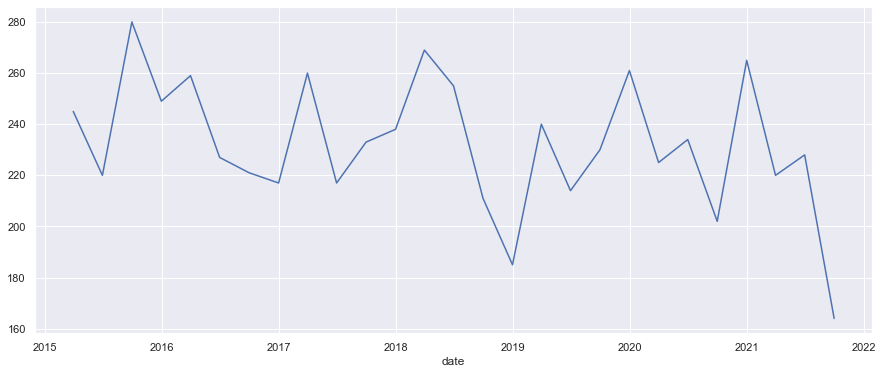

In [59]:
# calcolo il numero di morti per ogni mese
kills_by_Q = kills.resample('Q', on = 'date').id.count()

# creo un lineplot
sns.lineplot(x = kills_by_Q.index, y = kills_by_Q.values)

plt.show()

In [60]:
# morti per giorno della settimana
kills_by_weekday = kills.groupby(kills.date.dt.day_name()).size().reset_index().rename(columns = {0 : 'kills', 'date':'weekday'})

# ordino i giorni della settimana
kills_by_weekday.weekday = pd.Categorical(kills_by_weekday.weekday, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# stampo il dataframe
kills_by_weekday

,weekday,kills
0,Friday,896
1,Monday,847
2,Saturday,829
3,Sunday,864
4,Thursday,935
5,Tuesday,964
6,Wednesday,934


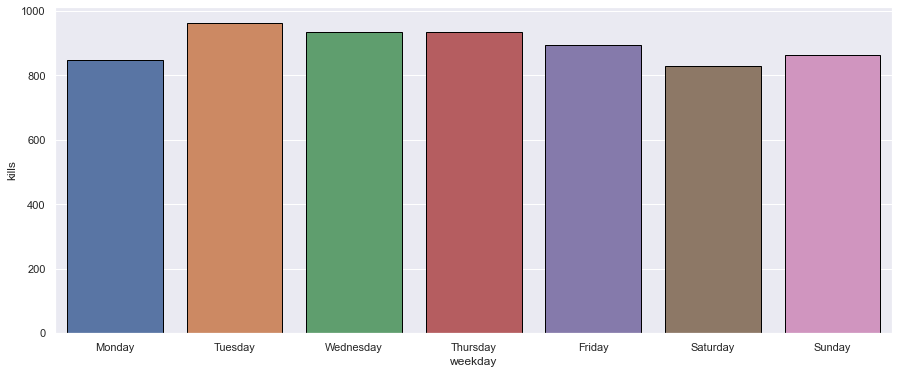

In [61]:
# creo un barplot
sns.barplot(data = kills_by_weekday, x = 'weekday', y = 'kills', edgecolor = 'black')

plt.show()

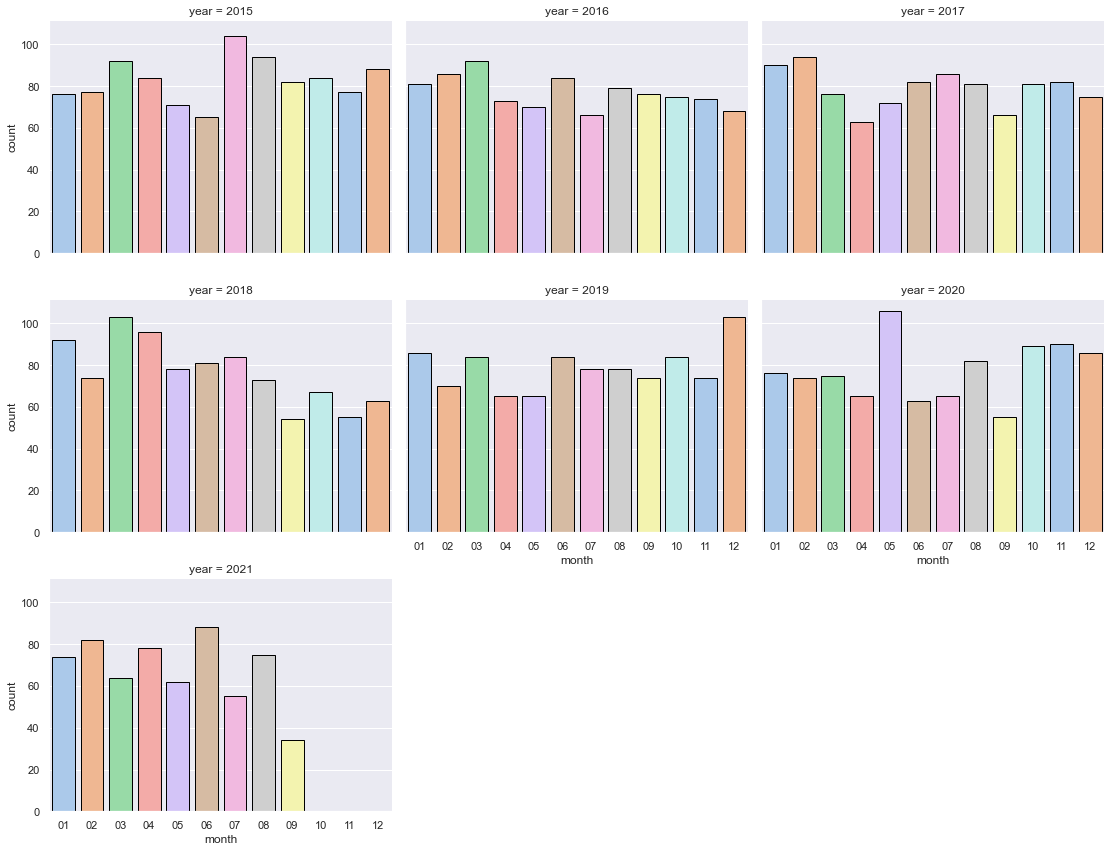

In [62]:
# creo colonna con anno dell'evento
kills['year'] = kills.date.dt.strftime('%Y')

# creo colonna con mese dell'evento
kills['month'] = kills.date.dt.strftime('%m')

# creo un catplot
sns.catplot(kind = 'count', x = 'month', col = 'year', col_wrap = 3, data = kills, palette = 'pastel', edgecolor = 'black', height = 4, aspect = 1.3)

plt.show()

Conclusioni
===
Analizzando nello specifico i dati abbiamo concluso che:
1. Il numero di vittime della polizia varia molto da stato a stato.
2. E' necessario tenere conto di questa differenza quando si analizza gli stati in cui potrebbe esistere un fenomeno razzista.
3. In alcuni stati la quota di vittime nere è sensibilmente più alta rispetto della loro quota nella popolazione, in altri è molto inferiore. In generale la quota di vittime nere è più alta della relativa proporzione nella popolazione.
4. La maggior parte delle vittime è uccisa attraverso colpi di arma da fuoco e non stava scappando al momento della morte.
5. Molte vittime stavano aggredendo gli ufficiali al momento della morte.
6. Il numero di uomini uccisi è sensibilmente maggiore rispetto a quello delle donne, ma non sembrano esserci differenze tra i sessi rispetto alla distribuzione per età.
7. In paesi con una basso reddito mediano e un alto poverty rate, il tasso di uccisione è maggiore.